In [1]:
import numpy as np
import pandas as pd

### Part 0: Data Cleaning

In [2]:
cars_csv = pd.read_csv('car_prices.csv')

In [3]:
cars_csv

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [4]:
cars_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
cars_csv.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [6]:
cars_csv["year"]=cars_csv["year"].astype(int)

In [7]:
cars_csv.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

We'll start by dropping Columns that we do not need to use for our calculations. For example, VIN and MMR(Manheim Market Report) as we are not interested in the individual car itself, and we MMR is another for of estimation for price. Additionally, we are also dropping the seller column as although there may be some data there, the goal here is to be able to generalize the model for predictions beyond just the initally provided dataset (IE An End User can provide for themselves)

In [8]:
mmr = cars_csv["mmr"]

In [9]:
cars_csv = cars_csv.drop(columns=["mmr", "seller", "vin", "saledate"])

Dropping the 12 NA Selling Price/Sales Data as that is what we are trying to Predict, plus 12 entries out of 500k+ seems fine. 

We'll also turn the make/model/trim/body to lower case for consistency in data

In [10]:
cars_csv['make']=cars_csv['make'].str.lower()
cars_csv['model']=cars_csv['model'].str.lower()
cars_csv['trim']=cars_csv['trim'].str.lower()
cars_csv['body']=cars_csv['body'].str.lower()

In [11]:
cars_csv=cars_csv[cars_csv['sellingprice'].notna()]

We Start with some EDA to see how we can fill in the missibng Model/Make/Trim/Body, as that is a fairly significant amount of missing data. For that, we look to see the Mode (Most Common) car per year, and fill it in there. Missing the Make seems to also correspond to missing the Model/Trim/Body so if there is no further information on what the Car's model actually consists of, it seems most prudent to predict it being the most common car of that year with the logic that if it was some special model, then it should be mentioned as such rather than remaining as NA.

In [12]:
cars_csv[cars_csv['make'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
742,2012,NaN,NaN,NaN,NaN,automatic,ca,38.0,23208.0,gray,black,46000.0
747,2012,NaN,NaN,NaN,NaN,automatic,ca,33.0,19785.0,beige,gray,46000.0
766,2012,NaN,NaN,NaN,NaN,automatic,ca,37.0,48424.0,black,black,43000.0
798,2012,NaN,NaN,NaN,NaN,automatic,ca,48.0,39825.0,—,gray,58500.0
803,2012,NaN,NaN,NaN,NaN,automatic,ca,49.0,35093.0,blue,tan,44500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558545,2000,NaN,NaN,NaN,NaN,automatic,ma,31.0,108900.0,green,gray,1100.0
558617,2007,NaN,NaN,NaN,NaN,automatic,pa,41.0,66393.0,—,beige,18500.0
558736,2011,NaN,NaN,NaN,NaN,automatic,nv,41.0,67820.0,silver,black,10500.0
558773,2005,NaN,NaN,NaN,NaN,automatic,tx,24.0,114787.0,burgundy,black,14800.0


In [13]:
cars_csv[cars_csv['make'].isna()]['model'].isna().sum()

10301

In [14]:
cars_csv[cars_csv['make'].isna()]['body'].isna().sum()

10301

In [15]:
make_modes = cars_csv.groupby('year')[['make', 'model', 'body', 'trim']].agg(lambda x: pd.Series.mode(x))
make_modes

,make,model,body,trim
year,,,,
1982,[],[],[],[]
1983,[],[],[],[]
1984,chevrolet,corvette,[],[]
1985,chevrolet,corvette,[],[]
1986,"[chevrolet, mercedes]","[420sel, corvette]",[],[]
1987,mercedes,300e,[],[]
1988,[],[],[],[]
1989,"[chevrolet, mercedes, toyota]","[300e, corvette]",[],"[4x4 dx, dx]"
1990,honda,accord,sedan,base


This is a good baseline, but we'll do some manual cleaning of the modes. The empty lists seems to have no missing data in the years, and the ones with multiple modes needs a little work to get the correct make/model, ie Mercedes 300e, rather than Chevorlet 300e, which does not exist, but is what would be the case if we just took the first element of each list. 

In [16]:
make_modes = make_modes.applymap(lambda x: np.nan if len(x)==0 else x)
make_modes

,make,model,body,trim
year,,,,
1982,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN
1984,chevrolet,corvette,NaN,NaN
1985,chevrolet,corvette,NaN,NaN
1986,"[chevrolet, mercedes]","[420sel, corvette]",NaN,NaN
1987,mercedes,300e,NaN,NaN
1988,NaN,NaN,NaN,NaN
1989,"[chevrolet, mercedes, toyota]","[300e, corvette]",NaN,"[4x4 dx, dx]"
1990,honda,accord,sedan,base


In [17]:
make_modes

,make,model,body,trim
year,,,,
1982,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN
1984,chevrolet,corvette,NaN,NaN
1985,chevrolet,corvette,NaN,NaN
1986,"[chevrolet, mercedes]","[420sel, corvette]",NaN,NaN
1987,mercedes,300e,NaN,NaN
1988,NaN,NaN,NaN,NaN
1989,"[chevrolet, mercedes, toyota]","[300e, corvette]",NaN,"[4x4 dx, dx]"
1990,honda,accord,sedan,base


Exploring the body of the Chevrolet Corvette reveals that it is not in the data, so we manually assign it to Sport. Additionally the trims seem to only have nan or Z06, so we manually assign it to the base model of a Corvette, LT1. We do the same with the Mercedes 300e with Body being Luxury, and the Trim being Premium as the current base level options

In [18]:
set(cars_csv[(cars_csv['make']=='chevrolet') & (cars_csv['model']=="corvette")]['body'])

{'convertible', 'coupe', 'hatchback', nan}

In [19]:
set(cars_csv[(cars_csv['make']=='chevrolet') & (cars_csv['model']=="corvette")]['trim'])

{'427',
 'base',
 'grand sport',
 'gs',
 'hardtop',
 nan,
 'stingray',
 'stingray z51',
 'z06',
 'z06 competition sport spec ed',
 'zr1'}

In [20]:
set(cars_csv[(cars_csv['make']=='mercedes') & (cars_csv['model']=="300e")]['body'])

{nan}

In [21]:
set(cars_csv[(cars_csv['make']=='mercedes') & (cars_csv['model']=="300e")]['trim'])

{nan}

In [22]:
make_modes.loc[1984]={'make': "chevrolet", 'model': "corvette", 'body': "sport", "trim": "lt1"}
make_modes.loc[1985]={'make': "chevrolet", 'model': "corvette", 'body': "sport", "trim": "lt1"}
make_modes.loc[1986]={'make': "chevrolet", 'model': "corvette", 'body': "sport", "trim": "lt1"}
make_modes.loc[1989]={'make': "chevrolet", 'model': "corvette", 'body': "sport", "trim": "lt1"}

In [23]:
make_modes.loc[1987]={'make': "mercedes", "model": "300e", 'body': "luxury", "trim": "premium"}

In [24]:
make_modes

,make,model,body,trim
year,,,,
1982,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN
1984,chevrolet,corvette,sport,lt1
1985,chevrolet,corvette,sport,lt1
1986,chevrolet,corvette,sport,lt1
1987,mercedes,300e,luxury,premium
1988,NaN,NaN,NaN,NaN
1989,chevrolet,corvette,sport,lt1
1990,honda,accord,sedan,base


Now we can finally assign each missing Model/Make/Body/Trim according to the Mode within its corresponding year

In [25]:
temp = cars_csv[cars_csv["make"].isna()][['year', 'make', 'body', 'trim']]
temp

,year,make,body,trim
742,2012,NaN,NaN,NaN
747,2012,NaN,NaN,NaN
766,2012,NaN,NaN,NaN
798,2012,NaN,NaN,NaN
803,2012,NaN,NaN,NaN
...,...,...,...,...
558545,2000,NaN,NaN,NaN
558617,2007,NaN,NaN,NaN
558736,2011,NaN,NaN,NaN
558773,2005,NaN,NaN,NaN


In [26]:
new_vals = pd.merge(temp, make_modes, left_on="year", right_index=True).drop(
    columns=['make_x', 'body_x', 'trim_x']).rename(
    columns={"make_y": "make", 'body_y': "body", 'trim_y': "trim"}
)
new_vals

,year,make,model,body,trim
742,2012,nissan,altima,sedan,base
747,2012,nissan,altima,sedan,base
766,2012,nissan,altima,sedan,base
798,2012,nissan,altima,sedan,base
803,2012,nissan,altima,sedan,base
...,...,...,...,...,...
187573,1991,toyota,camry,sedan,base
218179,1991,toyota,camry,sedan,base
207920,1982,NaN,NaN,NaN,NaN
530893,1982,NaN,NaN,NaN,NaN


In [27]:
new_vals['make']

742       nissan
747       nissan
766       nissan
798       nissan
803       nissan
           ...  
187573    toyota
218179    toyota
207920       NaN
530893       NaN
368682       NaN
Name: make, Length: 10301, dtype: object

In [28]:
index_list = list(new_vals.index)
cars_csv.loc[index_list, 'make'] = new_vals['make']
cars_csv.loc[index_list, 'model'] = new_vals['model']
cars_csv.loc[index_list, 'body'] = new_vals['body']
cars_csv.loc[index_list, 'trim'] = new_vals['trim']

In [29]:
cars_csv.isna().sum()

year                0
make               14
model             112
trim              364
body             2908
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

In [30]:
cars_csv[cars_csv['make'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
60242,1988,NaN,NaN,NaN,NaN,automatic,fl,2.0,100459.0,red,beige,6200.0
143821,1988,NaN,NaN,NaN,NaN,automatic,fl,1.0,128493.0,burgundy,—,900.0
166355,1988,NaN,NaN,NaN,NaN,automatic,md,2.0,92588.0,gray,gray,300.0
166356,1988,NaN,NaN,NaN,NaN,manual,md,2.0,86746.0,black,black,2800.0
167910,1988,NaN,NaN,NaN,NaN,automatic,md,2.0,165063.0,silver,blue,1000.0
191465,1988,NaN,NaN,NaN,NaN,automatic,ga,1.0,241751.0,black,black,700.0
207920,1982,NaN,NaN,NaN,NaN,automatic,ca,2.0,85738.0,gold,gray,5000.0
234575,1988,NaN,NaN,NaN,NaN,manual,md,2.0,78831.0,brown,gray,650.0
234577,1988,NaN,NaN,NaN,NaN,automatic,nv,2.0,195266.0,blue,—,200.0
281626,1988,NaN,NaN,NaN,NaN,automatic,md,2.0,224921.0,red,burgundy,300.0


We see here that all off the now missing values are sparse data, with a very wide range of values as it does not seem there is nay referece, as prices range from 300 dollars to 20,500 dollars,so we will be dropping them for the sake of prediction

In [31]:
cars_csv = cars_csv[cars_csv['make'].notna()]

In [32]:
cars_csv.isna().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

We see there are a few more models/trims that have NA, so we once again use the same system to find the most common Make/Trim/Model of the corresponding car

In [33]:
model_mode = cars_csv.groupby("make")["model"].agg(lambda x: pd.Series.mode(x)[0])
model_mode

make
acura                       tl
airstream           interstate
aston martin        v8 vantage
audi                        a4
bentley         continental gt
                     ...      
tesla                  model s
toyota                   camry
volkswagen               jetta
volvo                      s60
vw                      routan
Name: model, Length: 66, dtype: object

In [34]:
missing_models = cars_csv[cars_csv['model'].isna()]
missing_models

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
72,2014,bmw,NaN,750li,sedan,automatic,ca,43.0,12172.0,black,black,66000.0
31262,2014,bmw,NaN,750i,sedan,automatic,ga,44.0,4488.0,silver,black,64200.0
61951,2014,bmw,NaN,750li xdrive,sedan,automatic,oh,48.0,387.0,black,black,72500.0
61955,2014,bmw,NaN,750li xdrive,sedan,automatic,oh,46.0,414.0,white,—,68500.0
61956,2014,bmw,NaN,750i,sedan,automatic,oh,48.0,4796.0,NaN,NaN,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
546744,2014,bmw,NaN,750li xdrive,sedan,automatic,oh,38.0,7394.0,black,black,56000.0
549010,2014,bmw,NaN,750li xdrive,sedan,automatic,oh,44.0,943.0,blue,tan,64500.0
549011,2014,bmw,NaN,750li,sedan,automatic,oh,4.0,12895.0,white,black,57500.0
552124,2015,audi,NaN,2.0 tfsi premium quattro,sedan,automatic,tx,35.0,4529.0,gray,black,27000.0


In [35]:
models = pd.merge(missing_models, model_mode, left_on="make", right_index=True).drop(
    columns=['model_x']).rename(columns={'model_y': "model"})
models

,year,make,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,model
72,2014,bmw,750li,sedan,automatic,ca,43.0,12172.0,black,black,66000.0,3 series
31262,2014,bmw,750i,sedan,automatic,ga,44.0,4488.0,silver,black,64200.0,3 series
61951,2014,bmw,750li xdrive,sedan,automatic,oh,48.0,387.0,black,black,72500.0,3 series
61955,2014,bmw,750li xdrive,sedan,automatic,oh,46.0,414.0,white,—,68500.0,3 series
61956,2014,bmw,750i,sedan,automatic,oh,48.0,4796.0,NaN,NaN,75000.0,3 series
...,...,...,...,...,...,...,...,...,...,...,...,...
475038,2015,audi,2.0 tfsi premium quattro,sedan,NaN,pa,49.0,8109.0,gray,black,26900.0,a4
520716,2015,audi,2.0 tfsi premium quattro,sedan,automatic,ca,5.0,7652.0,white,black,25000.0,a4
520731,2015,audi,2.0 tfsi premium quattro,sedan,NaN,pa,45.0,5271.0,black,black,26750.0,a4
552124,2015,audi,2.0 tfsi premium quattro,sedan,automatic,tx,35.0,4529.0,gray,black,27000.0,a4


In [36]:
index_list = list(models.index)
cars_csv.loc[index_list, 'model'] = models['model']

Fill the Trim values with baseline model under the logic that any further Trim would be mentioned by the end User

In [37]:
cars_csv['trim']=cars_csv['trim'].fillna("Base")

In [38]:
cars_csv.isna().sum()

year                0
make                0
model               0
trim                0
body             2894
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

Next Fill Out the Correct Car Bodies based on the Model

In [39]:
cars_csv[cars_csv['body'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
468,2013,lincoln,mkt,awd v6,NaN,automatic,ca,41.0,74874.0,black,black,17750.0
743,2012,bmw,750i,xdr 750i xdriv,NaN,automatic,ca,4.0,50790.0,gray,black,33500.0
770,2012,bmw,750li,750li,NaN,automatic,ca,37.0,31762.0,black,black,45000.0
793,2012,bmw,750i,750i,NaN,automatic,ca,49.0,53016.0,white,gray,34250.0
794,2012,bmw,750li,750li,NaN,automatic,ca,34.0,24739.0,white,gray,46750.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541919,2004,honda,accord,Base,NaN,automatic,nc,35.0,199124.0,burgundy,gray,3200.0
548316,2010,chevrolet,malibu,Base,NaN,automatic,mi,33.0,73483.0,gray,brown,7400.0
548323,2010,chevrolet,malibu,Base,NaN,automatic,in,33.0,59853.0,black,gray,7200.0
550571,2010,chevrolet,malibu,Base,NaN,automatic,mn,28.0,76282.0,white,gray,7400.0


In [40]:
modes = cars_csv.groupby(["make", "model"])["body"].agg(lambda x: pd.Series.mode(x) if len(pd.Series.mode(x))>0 else np.nan)
modes[modes.isna()]

make       model     
acura      el            NaN
airstream  interstate    NaN
bmw        1             NaN
           320i          NaN
           323i          NaN
                        ... 
suzuki     swift         NaN
toyota     previa        NaN
vw         beetle        NaN
           jetta         NaN
           routan        NaN
Name: body, Length: 112, dtype: object

Doing some Outside research reveals a very eclectic collection of what these cars are indvidually when looking at the Make, so we'll fill it out using the most common Body of the Make of the car, even if this would not be technically correc

In [41]:
body_modes = cars_csv.groupby("make")["body"].agg(lambda x: pd.Series.mode(x) if len(pd.Series.mode(x))>0 else np.nan)
body_modes

make
acura           sedan
airstream         NaN
aston martin    coupe
audi            sedan
bentley         coupe
                ...  
tesla           sedan
toyota          sedan
volkswagen      sedan
volvo           sedan
vw                NaN
Name: body, Length: 66, dtype: object

Looking at what does not fit in, I think it's safe to drop them as they are in many cases, misinputted data such as adding the Model on top of the make, or not consistently saying the correct make. Additionally, we need to replace them in our original data. We drop the airstream/dot for being sparse data, and we rename the others to be a proper make.

In [42]:
body_modes[body_modes.isna()]

make
airstream     NaN
chev truck    NaN
dodge tk      NaN
dot           NaN
ford tk       NaN
ford truck    NaN
gmc truck     NaN
hyundai tk    NaN
landrover     NaN
mazda tk      NaN
mercedes-b    NaN
vw            NaN
Name: body, dtype: object

In [43]:
proper_cars = {"chev truck": "chev", "dodge tk": "dodge", "ford tk": "ford",
              'ford truck': 'ford', 'gmc truck': 'gmc', "hyundai tk": "hyundai",
               'mercedes-b': 'mercedes', "vw": "volkswagen", "chev": "chevrolet",
               'mazda tk': "mazda"
              }

In [44]:
cars_csv['make'] = cars_csv['make'].apply(lambda x: proper_cars[x] if x in proper_cars.keys() else x)

In [45]:
body_modes = body_modes.dropna()

From here, we do our same merge as we've done before to fill in the np.Nan in the data

In [46]:
missing_body = cars_csv[cars_csv["body"].isna()]
body_merge = pd.merge(missing_body, body_modes, left_on="make", right_index=True).drop(columns=["body_x"]).rename(
    columns={"body_y":"body"})

In [47]:
index_list = body_merge.index
cars_csv.loc[index_list, 'body']=body_merge['body']

In [48]:
cars_csv.isna().sum()

year                0
make                0
model               0
trim                0
body               30
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

In [49]:
cars_csv[cars_csv['body'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
3341,2007,landrover,lr3,v8 se,NaN,automatic,ca,45.0,108990.0,white,black,13000.0
3405,2007,landrover,rangerover,sport s/c,NaN,automatic,ca,34.0,118666.0,black,black,16500.0
3710,2006,landrover,lr3,v8 hse,NaN,automatic,ca,19.0,106133.0,gray,black,7000.0
3816,2006,landrover,range,rover 4.2l s/c,NaN,automatic,ca,28.0,95312.0,black,black,14250.0
3853,2006,landrover,rangerover,sport hse,NaN,automatic,ca,23.0,81720.0,silver,black,13500.0
3897,2006,landrover,lr3,v8 se,NaN,automatic,ca,35.0,83000.0,black,beige,9900.0
3926,2006,landrover,rangerover,hse,NaN,automatic,ca,22.0,140194.0,white,black,6250.0
3956,2006,landrover,rangerover,hse,NaN,automatic,ca,3.0,129199.0,green,green,5200.0
3963,2006,landrover,lr3,v8 se,NaN,automatic,ca,36.0,131663.0,gray,black,5200.0
4148,2005,landrover,lr3,v8 se,NaN,automatic,ca,32.0,106228.0,gray,tan,7000.0


Looking over at our data, it seems like everything else is a Landrover, which are SUVs, or an AirStream a 200k travelling coach, or a Dot Durango, which I can't find any information on: So I'll drop drop the latter two, and fill the first entry in as SUV

In [50]:
cars_csv = cars_csv[(cars_csv["make"]!="dot") & (cars_csv["make"]!="airstream")]
cars_csv["body"] = cars_csv["body"].fillna("suv")

In [51]:
cars_csv.isna().sum()

year                0
make                0
model               0
trim                0
body                0
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

Next Up: Transmissions. Let's take a deeper look, and we some incorrectly inputted data. We'll begin by replacing Sedan, which isn't a type of transmission, with np.nan

In [52]:
set(cars_csv["transmission"])

{'Sedan', 'automatic', 'manual', nan, 'sedan'}

In [53]:
cars_csv["transmission"] = cars_csv["transmission"].str.lower()

In [434]:
cars_csv["transmission"] = cars_csv["transmission"].replace(to_replace=["sedan"], value=np.nan)

According to this article https://www.rd.com/article/why-americans-drive-automatic/ , about 96% of Americans drive automatics, we'll do a probability based impute on whether or not the data should be manual or automatic based on those odds. 

In [55]:
missing_values_length = cars_csv["transmission"].isna().sum()
imputed_values = np.random.choice(['automatic', "manual"],
                                 p=[.96, .04],
                                 size=missing_values_length)
cars_csv.loc[cars_csv['transmission'].isna(), "transmission"] = imputed_values

In [56]:
cars_csv.isna().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
state               0
condition       11820
odometer           94
color             749
interior          749
sellingprice        0
dtype: int64

Let's Also do the same with imputing the conditions based on a rough probability distribition in each 5 group, to then impute values into the missing conditions. We see how much is in each bin, and then assign probabilites based on the count/sum, and then place the value within the middle of the bin itself

In [57]:
bins = np.arange(0, 55, 5)
binning_data= pd.cut(cars_csv['condition'], bins)
probabilities = binning_data.value_counts()/binning_data.value_counts().sum()

In [58]:
assigned_mid_values = [42.5, 37.5, 32.5, 2.5, 27.5, 47.5, 22.5, 17.5, 12.5, 7.5]
imputed_conditions = np.random.choice(assigned_mid_values, p=probabilities.values, size=cars_csv["condition"].isna().sum())

In [59]:
cars_csv.loc[cars_csv['condition'].isna(), "condition"] = imputed_conditions

In [60]:
cars_csv.isna().sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
state             0
condition         0
odometer         94
color           749
interior        749
sellingprice      0
dtype: int64

We apply that same categories but to odometer, color, and interior. And first up with Odometer, probably a missed input unless someone drove a million miles 

In [61]:
odo_bins = np.arange(0,1000000,10000)

In [62]:
cuts = pd.cut(cars_csv['odometer'], odo_bins)
probabilities = cuts.value_counts()/cuts.value_counts().sum()
imputed_odo = np.random.choice(probabilities.index, p=probabilities.values, size=cars_csv["odometer"].isna().sum())

In [63]:
left_side = lambda x: x.right
imputed_odo=np.vectorize(left_side)(imputed_odo)

In [64]:
cars_csv.loc[cars_csv['odometer'].isna(), "odometer"] = imputed_odo

In [65]:
cars_csv.isna().sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
state             0
condition         0
odometer          0
color           749
interior        749
sellingprice      0
dtype: int64

Replacing the numbers and - with Np.nan 

In [66]:
set(cars_csv["color"])

{'11034',
 '1167',
 '12655',
 '14872',
 '15719',
 '16633',
 '18384',
 '18561',
 '20379',
 '20627',
 '2172',
 '2711',
 '2817',
 '2846',
 '339',
 '4802',
 '5001',
 '5705',
 '6158',
 '6388',
 '6864',
 '721',
 '9410',
 '9562',
 '9837',
 '9887',
 'beige',
 'black',
 'blue',
 'brown',
 'burgundy',
 'charcoal',
 'gold',
 'gray',
 'green',
 'lime',
 nan,
 'off-white',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'turquoise',
 'white',
 'yellow',
 '—'}

In [67]:
replacements = {'11034',
 '1167',
 '12655',
 '14872',
 '15719',
 '16633',
 '18384',
 '18561',
 '20379',
 '20627',
 '2172',
 '2711',
 '2817',
 '2846',
 '339',
 '4802',
 '5001',
 '5705',
 '6158',
 '6388',
 '6864',
 '721',
 '9410',
 '9562',
 '9837',
 '9887',
 '—'
}

In [68]:
cars_csv["color"] = cars_csv["color"].apply(lambda x: np.nan if x in replacements else x)

In [69]:
color_range= set(cars_csv['color'].dropna())
color_odds = cars_csv["color"].dropna().value_counts()/cars_csv["color"].dropna().value_counts().sum()
imputed_colors = np.random.choice(color_odds.index, p=color_odds.values, size=cars_csv["color"].isna().sum())

In [70]:
cars_csv.loc[cars_csv['color'].isna(), "color"] = imputed_colors

In [71]:
cars_csv["interior"] = cars_csv["interior"].apply(lambda x: np.nan if x in replacements else x)
interior_range= set(cars_csv['interior'].dropna())
interior_odds = cars_csv["interior"].dropna().value_counts()/cars_csv["interior"].dropna().value_counts().sum()
imputed_interior = np.random.choice(interior_odds.index, p=interior_odds.values, size=cars_csv["interior"].isna().sum())

In [72]:
cars_csv.loc[cars_csv['interior'].isna(), "interior"] = imputed_interior

In [73]:
cars_csv.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

# Part 0.5: EDA

Now that our Data is finally clean, let's take a look at some statistics and interesting finds:
Here we see a disconnet, where most people rate their cars slightly below perfect condition, what we might think of as "good", and then there's a notable decline to average/poor. Interestingly, people don't seem to rate their car very poorly, as there's another spike down to the 0-5 range, perhaps the ranking here is broken?

In [74]:
import matplotlib.pyplot as plt

In [75]:
count, bins= np.histogram(cars_csv['condition'])

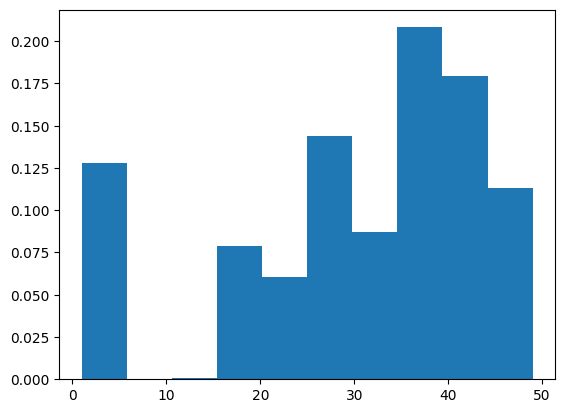

In [76]:
plt.stairs(count/count.sum(), bins, fill=True)

In [77]:
year_counts = cars_csv["year"].value_counts()
year_counts = year_counts.sort_index(ascending=True)

In [78]:
year_counts.values

array([     5,     10,     11,      8,     20,     49,     67,    132,
          205,    392,    711,    851,   1546,   2148,   3363,   5227,
         6468,   9715,  13281,  17342,  21394,  26913,  30845,  31502,
        20594,  26485,  48548, 102312,  98160,  81068,   9437],
      dtype=int64)

<BarContainer object of 31 artists>

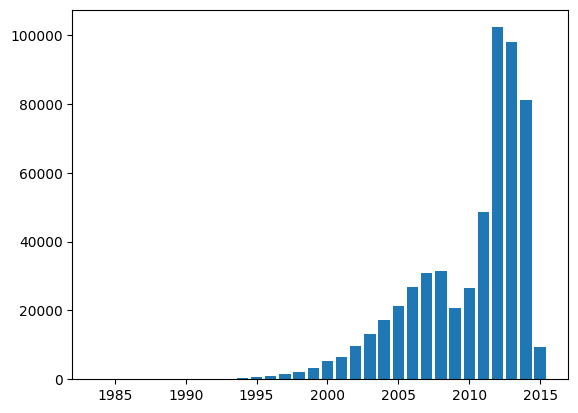

In [79]:
plt.bar(year_counts.index, year_counts.values)

In [80]:
count, bins = np.histogram(cars_csv["odometer"], bins=100)

In [81]:
count

array([25795, 58436, 66793, 70826, 48329, 41026, 31741, 26166, 25645,
       26774, 23208, 20931, 18179, 15348, 12764, 10556,  8313,  6624,
        5137,  4106,  3068,  2281,  1696,  1237,   942,   661,   574,
         370,   289,   250,   151,   130,    90,    64,    53,    44,
          32,    29,    15,    13,     3,     5,     7,     7,     5,
           8,     3,     2,     1,     1,     1,     0,     1,     1,
           0,     0,     0,     0,     1,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     2,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     0,     0,     1,
          72], dtype=int64)

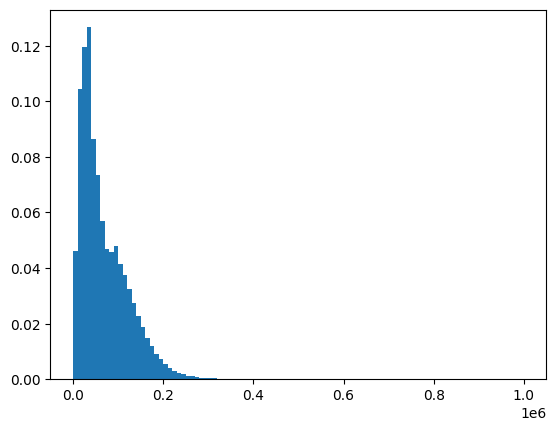

In [82]:
plt.stairs(count/count.sum(), bins, fill=True)

Most of the Data is below 400000 data, so we'll apply a filter here to trim the outliers

In [83]:
cars_csv["odometer"] = cars_csv["odometer"].mask(cars_csv['odometer']>400000, 400000)

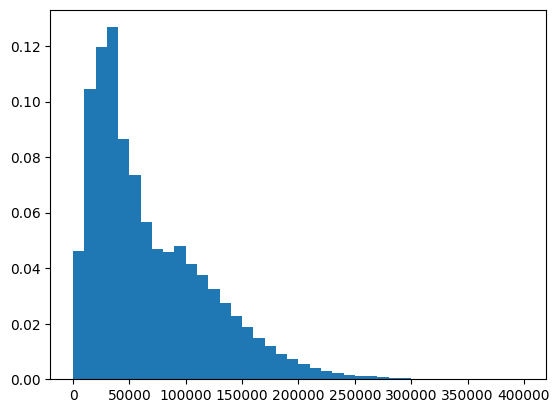

In [84]:
count, bins = np.histogram(cars_csv["odometer"], bins=40)
plt.stairs(count/count.sum(), bins, fill=True)

In [436]:
cars_csv['transmission'].value_counts()/cars_csv['transmission'].value_counts().sum()

transmission
automatic    0.9638
manual       0.0362
Name: count, dtype: float64

In [446]:
cars_csv['color'].value_counts().head(10)

color
black       116295
white       111769
silver       87353
gray         86782
blue         53651
red          45629
green        11896
gold         11850
beige         9661
burgundy      9418
Name: count, dtype: int64

In [445]:
cars_csv['interior'].value_counts().head(10)

interior
black        252307
gray         184527
beige         61766
tan           45478
brown          8924
red            1409
blue           1186
silver         1155
off-white       501
purple          347
Name: count, dtype: int64

In [443]:
cars_csv['body'].value_counts().head(10)

body
sedan          253859
suv            144381
hatchback       26238
minivan         25529
coupe           17752
crew cab        16394
wagon           16128
convertible     10476
supercrew        9033
g sedan          7417
Name: count, dtype: int64

In [444]:
cars_csv['make'].value_counts().head(10)

make
ford         99997
chevrolet    63269
nissan       54952
toyota       40151
dodge        30954
honda        27618
hyundai      21832
bmw          20793
kia          18296
chrysler     17483
Name: count, dtype: int64

# Part 1: Predictive Task

The goal here is to predict Sales Price, and the metric for comparing the efficiency of the model will be Root Mean Squared Error, or RMSE. There's a number of reasons, as to start with, it provides an average for how much the model is off by. Additionally, it serves to punish "Large" errors when predicting, and while that may lead to overfitting, it serves as an incentive, especially as we've already worked to trim outliers, and done some Data Cleaning already for unusual values. Finally, RMSE allows for differentiation, allowing the usage of Gradient Descent, while the Squaring and then taking the root allows for the errors to be positive, and then back into the same scale as the original data. 

We'll begin by splitting our Data into a Training/Validation/Testing to compare the eventually RMSE, and for Hyperparameter tuning later on

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [86]:
x_vals = cars_csv.drop(columns=['sellingprice'])
y_vals = cars_csv['sellingprice']
x_train, x_temp, y_train, y_temp = train_test_split(x_vals, y_vals,train_size=0.6,  random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, train_size = 0.5, random_state=42)

## Baseline Models

For baseline models, we'll begin with Linear Regression, assuming a linear relationship between every variable and the rating. This serves as our baseline comparison to compare our model.

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [88]:
preprocess = ColumnTransformer(
    transformers = [
        ('standardize', StandardScaler(), ["condition",'odometer']),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['make', "model", "body", "trim", "state", "transmission", "color", "interior"]),
    ],
    remainder="passthrough"

)

In [89]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

In [90]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['condition', 'odometer']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor', LinearRegression())])

In [91]:
y_predict_linear = pipeline.predict(x_test)

In [92]:
print("RMSE Linear Regression: ", np.sqrt(mean_squared_error(y_test, y_predict_linear)))

RMSE Linear Regression:  3525.676608597477


Linear Regression Gives us about 3525.61 dollars off on average, not bad not bad. But can we do better?

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [94]:
preprocess = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['make', "model", "body", "trim", "state", "transmission", "color", "interior"]),
    ],
    remainder="passthrough"

)

In [95]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor(n_jobs=-1))
])

In [97]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor', RandomForestRegressor(n_jobs=-1))])

In [98]:
y_predict_rf = pipeline.predict(x_test)

In [99]:
print("RMSE Random Forest: ", np.sqrt(mean_squared_error(y_test, y_predict_rf)))

RMSE Random Forest:  2248.33943728454


Well, the RMSE Was a lot lower... but it also took something like 10 minutes to calculate and I have a really beefy setup, so let's try something else! Next up: XGBoost

In [337]:
from xgboost import XGBRegressor

In [338]:
preprocess = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['make', "model", "body", "trim", "state", "transmission", "color", "interior"]),
    ],
    remainder="passthrough"

)

In [339]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', XGBRegressor(n_jobs=-1))
])

In [181]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, d...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [182]:
xgb_predict = pipeline.predict(x_test)

In [183]:
print("RMSE XGBoosting: ", np.sqrt(mean_squared_error(y_test, xgb_predict)))

RMSE XGBoosting:  2886.9218408088955


Pretty Good! The RMSE is lower than Linear Regression, and although Higher than RandomForest, this also took mere seconds to train rather than 10 actual minutes. Lets compare to some other Gradient Boostings though, such as lightGBM and catboost.

In [184]:
from catboost import CatBoostRegressor

In [ ]:
preprocess = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['make', "model", "body", "trim", "state", "transmission", "color", "interior"]),
    ],
    remainder="passthrough"
)

In [186]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', CatBoostRegressor())
])

In [201]:
pipeline.fit(x_train, y_train)

Learning rate set to 0.096244
0:	learn: 9286.4721209	total: 14.4ms	remaining: 14.4s
1:	learn: 8878.5487376	total: 27.4ms	remaining: 13.7s
2:	learn: 8519.9006788	total: 40.4ms	remaining: 13.4s
3:	learn: 8213.8443056	total: 54.3ms	remaining: 13.5s
4:	learn: 7944.6296874	total: 67.4ms	remaining: 13.4s
5:	learn: 7703.0828404	total: 82ms	remaining: 13.6s
6:	learn: 7489.0857572	total: 95.3ms	remaining: 13.5s
7:	learn: 7291.4873573	total: 109ms	remaining: 13.5s
8:	learn: 7125.2797740	total: 123ms	remaining: 13.6s
9:	learn: 6969.5324496	total: 137ms	remaining: 13.6s
10:	learn: 6829.1870536	total: 153ms	remaining: 13.8s
11:	learn: 6704.3847347	total: 167ms	remaining: 13.8s
12:	learn: 6594.1057502	total: 181ms	remaining: 13.7s
13:	learn: 6492.9745684	total: 195ms	remaining: 13.7s
14:	learn: 6401.9173006	total: 210ms	remaining: 13.8s
15:	learn: 6309.2373228	total: 224ms	remaining: 13.8s
16:	learn: 6231.6536724	total: 238ms	remaining: 13.8s
17:	learn: 6154.6301663	total: 252ms	remaining: 13.7s
18:

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000002429190BB50>)])

In [202]:
 catboost_predicts = pipeline.predict(x_test)

In [203]:
print("RMSE CatBoost: ", np.sqrt(mean_squared_error(y_test, catboost_predicts)))

RMSE CatBoost:  2417.5218762359996


CatBoost has some potential here! Prediction was lower than XGBoost, but not quite to the level of XGBRegressor yet. Both potentially may be worth HyperParameter tuning, especially since they train far faster than RandomForest. Last up, LightGBM

In [205]:
from lightgbm import LGBMRegressor

In [206]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', LGBMRegressor())
])

In [207]:
pipeline.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 223523, number of used features: 1222
[LightGBM] [Info] Start training from score 13613.337827


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor', LGBMRegressor())])

In [208]:
lgbm_predict = pipeline.predict(x_test)

In [209]:
print("RMSE LightGBM: ", np.sqrt(mean_squared_error(y_test, lgbm_predict)))

RMSE LightGBM:  3155.9011494532665


Performance isn't as good as XGBoost/CatBoost so we'll be choosing one of the others instead

# Part 2: HyperParameter Tuning

In [359]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

In [365]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', XGBRegressor(n_jobs=-1))
])

In [370]:
param_grid = {
    'regressor__n_estimators': randint(50, 500),
    'regressor__max_depth': randint(7, 13),
    'regressor__learning_rate': uniform(0.01, 0.5),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5),
    'regressor__gamma': uniform(0, 0.5),
    'regressor__reg_alpha': uniform(0, 0.5),
    'regressor__reg_lambda': uniform(0, 0.5)
}

In [371]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=50, cv=5, 
                                   random_state=42)

In [372]:
start = time.time()
random_search.fit(x_train, y_train)
print(time.time()-start)

630.4864130020142


In [373]:
random_search.best_params_

{'regressor__colsample_bytree': 0.569746930326021,
 'regressor__gamma': 0.14607232426760908,
 'regressor__learning_rate': 0.19318092164684586,
 'regressor__max_depth': 12,
 'regressor__n_estimators': 495,
 'regressor__reg_alpha': 0.3925879806965068,
 'regressor__reg_lambda': 0.09983689107917987,
 'regressor__subsample': 0.7571172192068059}

In [374]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', XGBRegressor(
        colsample_bytree=0.55,
        gamma=0.15,
        learning_rate=0.2,
        max_depth= 12,
        n_estimators=500,
        reg_alpha=0.4,
        reg_lambda=0.1,
        subsample=0.75,
        n_jobs=-1))
])

In [375]:
pipeline.fit(x_train, y_train)
hyper1= pipeline.predict(x_test)
print("RMSE Hyper1: ", np.sqrt(mean_squared_error(y_test, hyper1)))

RMSE Hyper1:  2037.6984134373542


In [376]:
param_grid = {
    'regressor__n_estimators': randint(400, 600),
    'regressor__max_depth': randint(10, 15),
    'regressor__learning_rate': uniform(0.15, 0.25),
    'regressor__subsample': uniform(0.65, 0.85),
    'regressor__colsample_bytree': uniform(0.45, 0.65),
    'regressor__gamma': uniform(0.05, 0.25),
    'regressor__reg_alpha': uniform(0.3, 0.5),
    'regressor__reg_lambda': uniform(0.05, 0.15)
}

In [377]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=20, cv=5, 
                                   random_state=42)

In [378]:
start = time.time()
random_search.fit(x_train, y_train)
print(time.time()-start)

c:\Users\charl\anaconda3\envs\cuda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\charl\anaconda3\envs\cuda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\charl\anaconda3\envs\cuda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\charl\anaconda3\envs\cuda\Lib\site-packages\sklearn\pipeline.py", line 4

289.48661255836487


In [380]:
random_search.best_params_

{'regressor__colsample_bytree': 0.844904153735935,
 'regressor__gamma': 0.09263103092182289,
 'regressor__learning_rate': 0.16626289824631987,
 'regressor__max_depth': 13,
 'regressor__n_estimators': 488,
 'regressor__reg_alpha': 0.7828160165372797,
 'regressor__reg_lambda': 0.17125960221746916,
 'regressor__subsample': 0.9089217037973651}

In [381]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', XGBRegressor(
        colsample_bytree=0.85,
        gamma=0.09,
        learning_rate=0.16,
        max_depth= 13,
        n_estimators=500,
        reg_alpha=0.8,
        reg_lambda=0.17,
        subsample=0.9,
        n_jobs=-1))
])

In [382]:
pipeline.fit(x_train, y_train)
hyper2= pipeline.predict(x_test)
print("RMSE Hyper2: ", np.sqrt(mean_squared_error(y_test, hyper2)))

RMSE Hyper2:  2013.6100958785908


Even More HyperParameter Tuning Centered Around our randomizedSearch shows us that we got pretty close, so we shall be using the first set of HyperParameters to avoid potential overfitting. 

# Part 3 Bonus Comparison

Last Up is a Bonus comparison to the Manheim Market Report, or MMR. This is the wholesale price of cars compiled by one of the largest Auto Auction Houses out there, and while we see that this model may not beat it, it gets very close and is not behind a paywall.

In [389]:
mmr_filtered = cars_csv[mmr.notna()]

C:\Users\charl\AppData\Local\Temp\ipykernel_20464\1682253787.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mmr_filtered = cars_csv[mmr.notna()]


In [391]:
x_vals_mmr = mmr_filtered.drop(columns=["sellingprice"])
y_vals_mmr = mmr_filtered["sellingprice"]

In [416]:
x_train, x_test, y_train, y_test = train_test_split(x_vals_mmr, y_vals_mmr, train_size=0.8,  random_state=42)

In [447]:
preprocess = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['make', "model", "body", "trim", "state", "transmission", "color", "interior"]),
    ],
    remainder="passthrough"
)

In [448]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', XGBRegressor(
        colsample_bytree=0.55,
        gamma=0.15,
        learning_rate=0.2,
        max_depth= 12,
        n_estimators=500,
        reg_alpha=0.4,
        reg_lambda=0.1,
        subsample=0.75,
        n_jobs=-1))
])

In [419]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.55, d...
                              feature_types=None, gamma=0.15, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [420]:
final_predictions = pipeline.predict(x_test)

In [421]:
print("RMSE Final Model: ", np.sqrt(mean_squared_error(y_test, final_predictions)))

RMSE Final Model:  1935.2251748737804


In [425]:
print("RMSE MMR: ", np.sqrt(mean_squared_error(y_test, mmr[y_test.index])))

RMSE MMR:  1749.9718737224268


In [427]:
from sklearn.metrics import mean_absolute_error

In [429]:
print("MAE Final Model: ", mean_absolute_error(y_test, final_predictions))
print("MAE MMR: ", mean_absolute_error(y_test, mmr[y_test.index]))

MAE Final Model:  1191.5595555930313
MAE MMR:  1085.6344479540433


# Parameters and Case Studies

In [453]:
x_condition = x_train.copy()

In [455]:
x_condition["condition"] = np.ones(len(x_condition["condition"]))

In [458]:
pipeline.fit(x_condition, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'body',
                                                   'trim', 'state',
                                                   'transmission', 'color',
                                                   'interior'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.55, d...
                              feature_types=None, gamma=0.15, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [460]:
no_cond = pipeline.predict(x_test)

In [461]:
print("RMSE No Conditions: ", np.sqrt(mean_squared_error(y_test, no_cond)))

RMSE No Conditions:  2086.7983698660832


In [ ]:
condi